In [2]:
# Import dependencies neeeded for the project
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
# The instructions for uploading the data through an API request was detailed on the data website
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 60000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j2j3-acqj", limit=60000)

# Convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

results_df.head()

,parcel_s,building_name,building_address,postal_code,floor_area,property_type,property_type_self_selected,pim_link,year_built,energy_audit_due_date,...,_2011_energy_star_score,_2022_reason_for_exemption,_2021_reason_for_exemption,_2020_reason_for_exemption,_2019_district_steam_use_kbtu_,_2018_district_steam_use_kbtu_,_2022_district_steam_use_kbtu_,_2021_district_steam_use_kbtu_,_2020_district_steam_use_kbtu_,_2020_energy_star_score
0,3572/001,23088-San Francisco/Treat Ave,300 Treat Ave,94110,69700,Commercial,Self-Storage Facility,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1908,2021-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0010/001,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,133675,Commercial,Office,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2024-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1145/003-J,Dorraine Zief Law Library,2101 Fulton St,94117,67014,Commercial,College/University,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,NaN,2022-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010/002,Argonaut Hotel-SV,495 JEFFERSON ST,94109,180000,Commercial,Hotel,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2025-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9900/045-A,Pier 45 - Shed A,45 PIER - SHED A,94133,71455,Commercial - Port Facility,Parking,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1900,2099-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Clean up data by only keeping the specific rows we want for our data analysis
# Drop all rows with NaN or Not Available or 0
# Lump all commercial buildings into one type
clean_results_df = results_df.loc[:,['building_name', 'floor_area', 'property_type', 'property_type_self_selected','year_built', '_2022_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2022_total_ghg_emissions_intensity_kgco2e_ft2_', '_2021_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2021_total_ghg_emissions_intensity_kgco2e_ft2_', '_2020_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2020_total_ghg_emissions_intensity_kgco2e_ft2_', 'a_2019_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2019_total_ghg_emissions_intensity_kgco2e_ft2_', '_2018_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2018_total_ghg_emissions_intensity_kgco2e_ft2_']]
results_na = clean_results_df.replace("Not Available", np.nan)
results_na = clean_results_df.replace("0", np.nan)
clean_results_df = results_na.dropna()
clean_results_df = clean_results_df.replace("Commercial - Port Facility", "Commercial")
clean_results_df.head()


,building_name,floor_area,property_type,property_type_self_selected,year_built,_2022_weather_normalized_source_eui_kbtu_ft2_,_2022_total_ghg_emissions_intensity_kgco2e_ft2_,_2021_weather_normalized_source_eui_kbtu_ft2_,_2021_total_ghg_emissions_intensity_kgco2e_ft2_,_2020_weather_normalized_source_eui_kbtu_ft2_,_2020_total_ghg_emissions_intensity_kgco2e_ft2_,a_2019_weather_normalized_source_eui_kbtu_ft2_,_2019_total_ghg_emissions_intensity_kgco2e_ft2_,_2018_weather_normalized_source_eui_kbtu_ft2_,_2018_total_ghg_emissions_intensity_kgco2e_ft2_
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3,195.6,6.4,205,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [5]:
# Rename the columns in the data frame to make it easier to read

clean_results_df = clean_results_df.rename(columns = {'building_name':'Building Name', 'floor_area':'Floor Area', 'property_type':'Property Type', 'property_type_self_selected': 'Property Subcategory','year_built':'Year Built', 
                                   '_2022_weather_normalized_source_eui_kbtu_ft2_':'2022 Source EUI (kBtu/ft2)', '_2022_total_ghg_emissions_intensity_kgco2e_ft2_':'2022 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2021_weather_normalized_source_eui_kbtu_ft2_':'2021 Source EUI (kBtu/ft2)', '_2021_total_ghg_emissions_intensity_kgco2e_ft2_':'2021 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2020_weather_normalized_source_eui_kbtu_ft2_':'2020 Source EUI (kBtu/ft2)', '_2020_total_ghg_emissions_intensity_kgco2e_ft2_':'2020 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   'a_2019_weather_normalized_source_eui_kbtu_ft2_':'2019 Source EUI (kBtu/ft2)', '_2019_total_ghg_emissions_intensity_kgco2e_ft2_':'2019 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2018_weather_normalized_source_eui_kbtu_ft2_':'2018 Source EUI (kBtu/ft2)', '_2018_total_ghg_emissions_intensity_kgco2e_ft2_':'2018 Total GHG Emissions Intensity (kGCO2e/ft2)'})

# Change the data type to float for all numerical entries
clean_results_df = clean_results_df.astype({'2022 Source EUI (kBtu/ft2)': 'float',
                                            '2022 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2021 Source EUI (kBtu/ft2)': 'float',
                                            '2021 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2020 Source EUI (kBtu/ft2)': 'float',
                                            '2020 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2019 Source EUI (kBtu/ft2)': 'float',
                                            '2019 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2018 Source EUI (kBtu/ft2)': 'float',
                                            '2018 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float'})



clean_results_df.head()

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [6]:
# counts for each property type
property_type_counts = clean_results_df.groupby(['Property Type'])['Building Name'].count()
property_type_counts.sort_values(ascending=False)


Property Type
Commercial           604
Mixed Residential     83
Name: Building Name, dtype: int64

In [28]:
# counts for each subcategory type
property_subcategory_counts = clean_results_df.groupby(['Property Subcategory'])['Building Name'].count()
property_subcategory_counts.sort_values(ascending=False)

Property Subcategory
Office                                                   333
Multifamily Housing                                       73
Hotel                                                     47
Retail Store                                              31
Mixed Use Property                                        30
Other                                                     26
Worship Facility                                          15
Supermarket/Grocery Store                                 14
College/University                                        10
Medical Office                                             9
Non-Refrigerated Warehouse                                 7
Bank Branch                                                7
Restaurant                                                 5
Manufacturing/Industrial Plant                             5
K-12 School                                                5
Laboratory                                                 4
Str

Question #1: What property subcategory type has the highest source energy use intensity and greenhouse gas emissions per square footage in the year 2022? Is there a correlation between GHG emissions and source EUI?


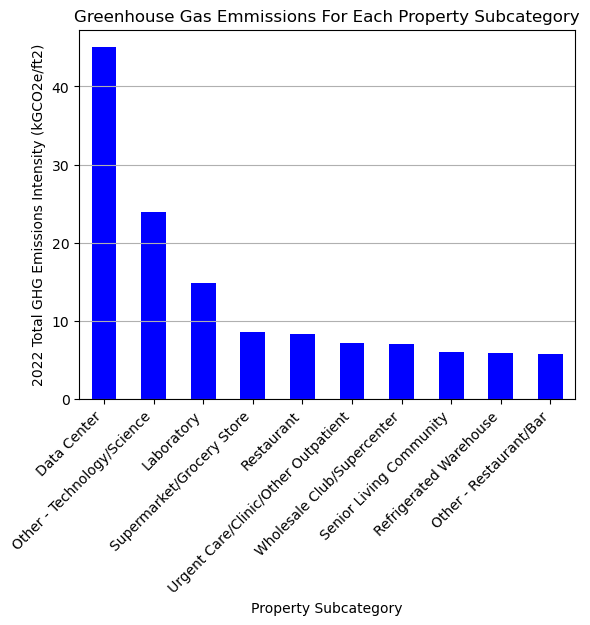

In [60]:
# Determine median GHG emission intesity for 2022 for property subcategory
ghg_use = clean_results_df.groupby("Property Subcategory")['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].median().sort_values(ascending=False).head(10)

ghg_use.plot.bar(color='b')
plt.xlabel("Property Subcategory")
plt.ylabel("2022 Total GHG Emissions Intensity (kGCO2e/ft2)")
plt.title("Greenhouse Gas Emmissions For Each Property Subcategory")
plt.grid(axis = 'y')
plt.xticks(rotation = 45, ha = 'right')
plt.savefig('Figure 1a GHG Emmissions vs Subcategory.png', bbox_inches='tight')
plt.show()

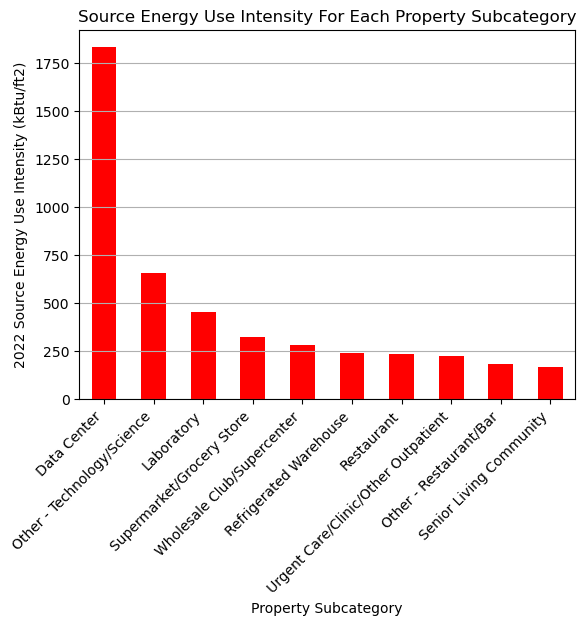

In [61]:
energy_use = clean_results_df.groupby("Property Subcategory")['2022 Source EUI (kBtu/ft2)'].median().sort_values(ascending=False).head(10)

energy_use.plot.bar(color='r')
plt.xlabel("Property Subcategory")
plt.ylabel("2022 Source Energy Use Intensity (kBtu/ft2)")
plt.title("Source Energy Use Intensity For Each Property Subcategory")
plt.grid(axis = 'y')
plt.xticks(rotation = 45, ha = 'right')
plt.savefig('Figure 1b Source EUI vs Subcategory.png', bbox_inches='tight')
plt.show()

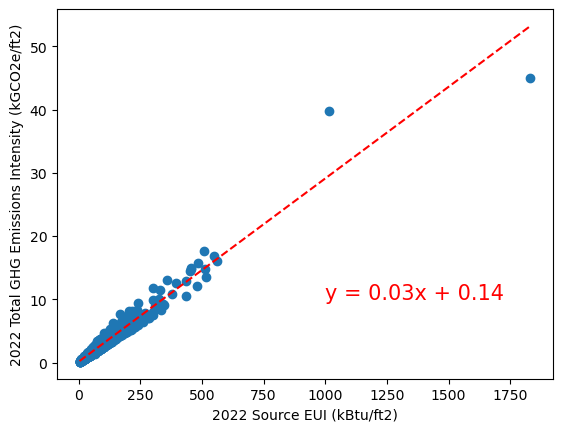

The r-value is: 0.9479693952701277


In [62]:
# plot source eui vs ghg emmissions and see if there is a correlation

eui = clean_results_df['2022 Source EUI (kBtu/ft2)']
ghg = clean_results_df['2022 Total GHG Emissions Intensity (kGCO2e/ft2)']

# Perform a linear regression
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(eui, ghg)
# find range of where we can calculate the regression
min_x = eui.min()
max_x = eui.max()
regres_values = np.linspace(min_x,max_x,100)
# Create equation of line 
pe_fit = pe_slope * regres_values + pe_int

line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))

plt.scatter(eui, ghg)
plt.plot(regres_values, pe_fit, "--", color='r')
plt.annotate(line_eq,(1000,10),fontsize=15,color="red")
plt.xlabel('2022 Source EUI (kBtu/ft2)')
plt.ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
plt.savefig('Figure 1c Source EUI vs GHG Emissions.png', bbox_inches='tight')
plt.show()
print(f"The r-value is: {pe_r**2}")

Question # 2: For commercial and residential buildings, check if there is a relationship between year built and greenhouse gas emission intensity.

C:\Users\zohai\AppData\Local\Temp\ipykernel_16424\4138717102.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binned_df = q2_df_commercial.groupby('bin').median()


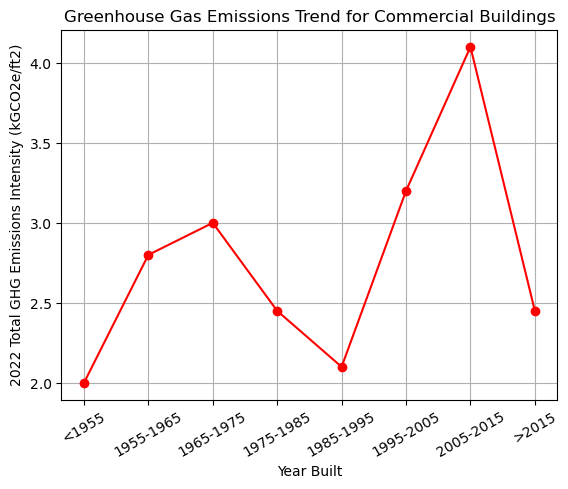

bin
<1955        403
1955-1965     34
1965-1975     39
1975-1985     52
1985-1995     46
1995-2005     17
2005-2015     11
>2015          2
Name: Building Name, dtype: int64

In [116]:
# Create bins for year built column
bins = [0, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2023]
labels = ['<1955','1955-1965','1965-1975','1975-1985','1985-1995','1995-2005','2005-2015','>2015']
q2_df = clean_results_df
q2_df = q2_df.astype({'Year Built': 'float'})
q2_df['bin'] = pd.cut(q2_df['Year Built'], bins=bins, labels=labels)

#filter to only include commercial buildings
q2_df_commercial = q2_df.loc[q2_df['Property Type'] == 'Commercial']

counts = q2_df_commercial.groupby('bin')['Building Name'].count()

# Create binned dataframe with mean values GHG emmissions
binned_df = q2_df_commercial.groupby('bin').median()

# plot the GHG emmissions for commmercial buildings
binned_df['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].plot.line(style='o-', color = 'r')
plt.xlabel("Year Built")
plt.ylabel("2022 Total GHG Emissions Intensity (kGCO2e/ft2)")
plt.xticks(rotation=30)
plt.grid()
plt.title("Greenhouse Gas Emissions Trend for Commercial Buildings")
plt.savefig('Figure 2a GHG Emissions Trend for Commercial Buildings.png', bbox_inches='tight')

plt.show()
counts

C:\Users\zohai\AppData\Local\Temp\ipykernel_16424\1321935100.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binned_df = q2_df_residential.groupby('bin').median()


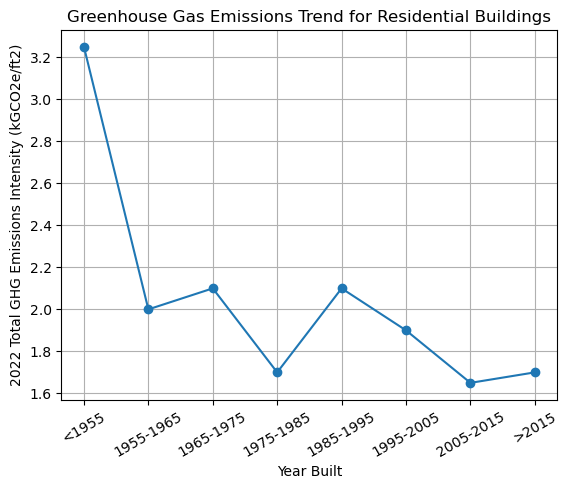

In [114]:
#filter to only include residential buildings
q2_df_residential = q2_df.loc[q2_df['Property Type'] == 'Mixed Residential']

# Create binned dataframe with median values GHG emmissions
binned_df = q2_df_residential.groupby('bin').median()

# plot the GHG emmissions for residential buildings
binned_df['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].plot.line(style='o-')
plt.xlabel("Year Built")
plt.ylabel("2022 Total GHG Emissions Intensity (kGCO2e/ft2)")
plt.xticks(rotation=30)
plt.grid()
plt.title("Greenhouse Gas Emissions Trend for Residential Buildings")
plt.savefig('Figure 2b GHG Emissions Trend for Commercial Buildings.png', bbox_inches='tight')
plt.show()

Question #3: Has the greenhouse gas emission intensity for commercial and residential buildings decreased since 2018? Create 2022 Green House Gas and Energy Use Intensity boxplots to calculate the quartiles and IQR, and list the potential outlying properties for commercial and residential buildings for year 2022.

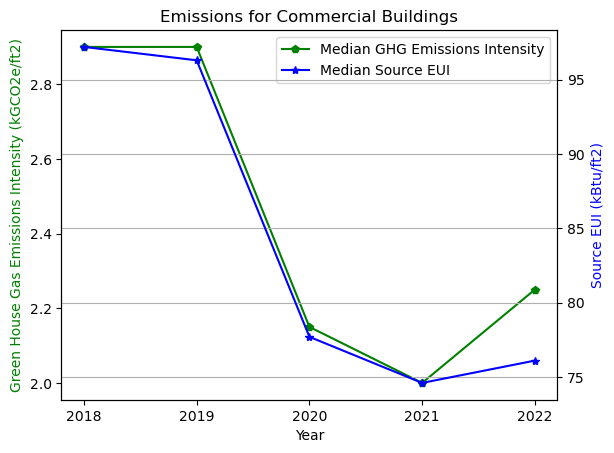

In [106]:
#Median emissions for commercial buildings for year 2018-2022
viz1 = clean_results_df.sort_values('Property Subcategory')
viz1 =viz1.reset_index(drop = True)
data_category1 = viz1.loc[viz1["Property Type"] == "Commercial"]
data_category1 =data_category1.reset_index(drop = True)
GHG_mean1 = [data_category1['2018 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(), 
            data_category1['2019 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category1['2020 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category1['2021 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].median()]

EUI_mean1 = [viz1['2018 Source EUI (kBtu/ft2)'].median(), 
            viz1['2019 Source EUI (kBtu/ft2)'].median(),
            viz1['2020 Source EUI (kBtu/ft2)'].median(),
            viz1['2021 Source EUI (kBtu/ft2)'].median(),
            viz1['2022 Source EUI (kBtu/ft2)'].median()]

years = ["2018", "2019", "2020","2021","2022"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
lns1 = ax1.plot(years,GHG_mean1,"g", marker = "p", label = "Median GHG Emissions Intensity")
lns2 = ax2.plot(years,EUI_mean1,"b", marker = "*", label = "Median Source EUI")
plt.title("Emissions for Commercial Buildings")
ax1.set_xlabel('Year')
ax1.set_ylabel('Green House Gas Emissions Intensity (kGCO2e/ft2)', color='g')
ax2.set_ylabel('Source EUI (kBtu/ft2)', color='b')

# adding legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= "upper right")

plt.grid(True)
plt.savefig('Figure 3a GHG Emissions Trend 2018-2022 for Commercial Buildings.png', bbox_inches='tight')
plt.show()

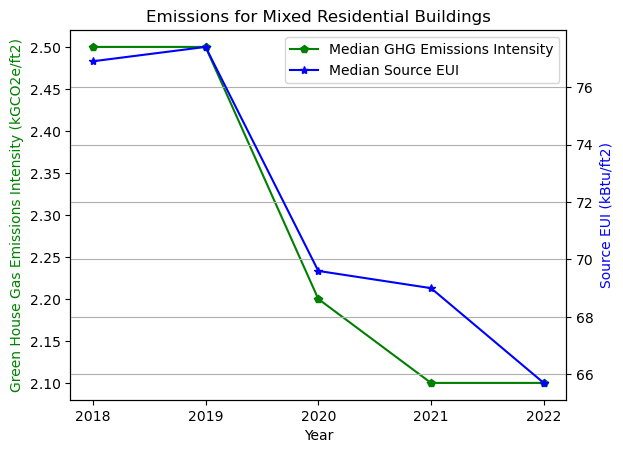

In [108]:
#Median emissions for Residential buildings for year 2018-2022
data_category2 = viz1.loc[viz1["Property Type"] == "Mixed Residential"]
data_category2 =data_category2.reset_index(drop = True)
GHG_mean2 = [data_category2['2018 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(), 
            data_category2['2019 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category2['2020 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category2['2021 Total GHG Emissions Intensity (kGCO2e/ft2)'].median(),
            data_category2['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].median()]
EUI_mean2 = [data_category2['2018 Source EUI (kBtu/ft2)'].median(), 
            data_category2['2019 Source EUI (kBtu/ft2)'].median(),
            data_category2['2020 Source EUI (kBtu/ft2)'].median(),
            data_category2['2021 Source EUI (kBtu/ft2)'].median(),
            data_category2['2022 Source EUI (kBtu/ft2)'].median()]

years = ["2018", "2019", "2020","2021","2022"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
lns1 = ax1.plot(years,GHG_mean2,"g", marker = "p", label = "Median GHG Emissions Intensity")
lns2 = ax2.plot(years,EUI_mean2,"b", marker = "*", label = "Median Source EUI")
plt.title("Emissions for Mixed Residential Buildings")
ax1.set_xlabel('Year')
ax1.set_ylabel('Green House Gas Emissions Intensity (kGCO2e/ft2)', color='g')
ax2.set_ylabel('Source EUI (kBtu/ft2)', color='b')
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= "upper right")

plt.grid(True)
plt.savefig('Figure 3b GHG Emissions Trend 2018-2022 for Residential Buildings.png', bbox_inches='tight')
plt.show()

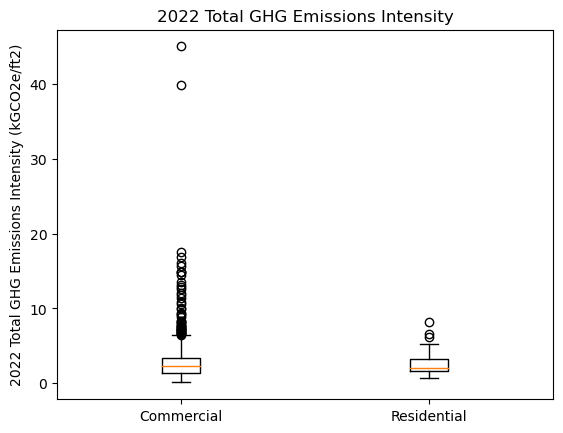

In [109]:
#Boxplots for 2022 Total GHG Emissions Intensity for Commercial and Residential category
GHG1 = data_category1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)']
GHG2 = data_category2['2022 Total GHG Emissions Intensity (kGCO2e/ft2)']
my_dict = {'Commercial': GHG1, 'Residential': GHG2}
plt.boxplot(my_dict.values(), labels=my_dict.keys());
plt.title('2022 Total GHG Emissions Intensity')
plt.ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
plt.savefig('Figure 3c GHG Emissions Box Plot.png', bbox_inches='tight')
plt.show()

In [101]:
#Finding the IQR, bounds and commercial outlying properties for 2022 Total GHG Emissions Intensity
quartiles = GHG1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Commercial 2022 Total GHG Emissions Intensity is: {lowerq}")
print(f"The upper quartile of Commercial 2022 Total GHG Emissions Intensity is: {upperq}")
print(f"The interquartile range of Commercial 2022 Total GHG Emissions Intensity is: {iqr}")
print(f"The the median of Commercial 2022 Total GHG Emissions Intensity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
out_df = data_category1.loc[(GHG1 > upper_bound) | (GHG1 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = data_category1['Property Subcategory'].nunique()
print(f'Percentage of Commercial property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_ghg = data_category1['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].idxmax()
print(f'Commercial Subcategory that has maximum GHG Emissions Intensity is: {data_category1.iloc[maxindex_ghg,3]}')

The lower quartile of Commercial 2022 Total GHG Emissions Intensity is: 1.4
The upper quartile of Commercial 2022 Total GHG Emissions Intensity is: 3.425
The interquartile range of Commercial 2022 Total GHG Emissions Intensity is: 2.025
The the median of Commercial 2022 Total GHG Emissions Intensity is: 2.25 
Values below -1.64 could be outliers.
Values above 6.46 could be outliers.
The outlier properties are: ['Data Center' 'Enclosed Mall' 'Hotel' 'Laboratory' 'Mixed Use Property'
 'Office' 'Other' 'Other - Restaurant/Bar' 'Other - Technology/Science'
 'Restaurant' 'Retail Store' 'Senior Living Community' 'Strip Mall'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient'
 'Wholesale Club/Supercenter']
Percentage of Commercial property subcategory that are outliers: = 33.33%
Commercial Subcategory that has maximum GHG Emissions Intensity is: Data Center


In [102]:
#Finding the IQR, bounds and residential outlying properties for 2022 Total GHG Emissions Intensity
quartiles = GHG2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Residential 2022 Total GHG Emissions Intensity is: {lowerq}")
print(f"The upper quartile of Residential 2022 Total GHG Emissions Intensity is: {upperq}")
print(f"The interquartile range of Residential 2022 Total GHG Emissions Intensity is: {iqr}")
print(f"The the median of Residential 2022 Total GHG Emissions Intensity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
out_df = data_category2.loc[(GHG2 > upper_bound) | (GHG2 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = data_category2['Property Subcategory'].nunique()
print(f'Percentage of Residential property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_ghg = data_category2['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].idxmax()
print(f'Residential Subcategory that has maximum GHG Emissions Intensity is: {data_category2.iloc[maxindex_ghg,3]}')

The lower quartile of Residential 2022 Total GHG Emissions Intensity is: 1.65
The upper quartile of Residential 2022 Total GHG Emissions Intensity is: 3.3
The interquartile range of Residential 2022 Total GHG Emissions Intensity is: 1.65
The the median of Residential 2022 Total GHG Emissions Intensity is: 2.1 
Values below -0.82 could be outliers.
Values above 5.78 could be outliers.
The outlier properties are: ['Multifamily Housing']
Percentage of Residential property subcategory that are outliers: = 14.29%
Residential Subcategory that has maximum GHG Emissions Intensity is: Multifamily Housing


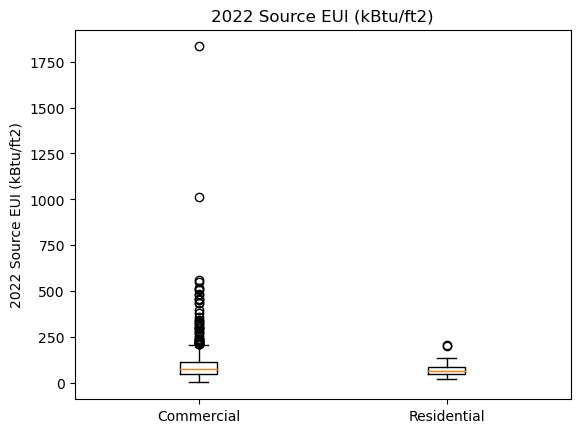

In [110]:
#Boxplots for 2022 Total GHG Emissions Intensity for Commercial and Residential category
EUI1 = data_category1['2022 Source EUI (kBtu/ft2)']
EUI2 = data_category2['2022 Source EUI (kBtu/ft2)']
my_dict = {'Commercial': EUI1, 'Residential': EUI2}
plt.boxplot(my_dict.values(), labels=my_dict.keys());
plt.title('2022 Source EUI (kBtu/ft2)')
plt.ylabel('2022 Source EUI (kBtu/ft2)')
plt.savefig('Figure 3d GHG Source EUI Box Plot.png', bbox_inches='tight')
plt.show()

In [104]:
#Finding the IQR, bounds and commercial outlying properties for 2022 Source EUI
quartiles = EUI1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 2022 Source EUI is: {round(lowerq,2)}")
print(f"The upper quartile of 2022 Source EUI is: {upperq}")
print(f"The interquartile range of 2022 Source EUI is: {iqr}")
print(f"The the median of 2022 Source EUI is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
out_df = data_category1.loc[(EUI1 > upper_bound) | (EUI1 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = data_category1['Property Subcategory'].nunique()
print(f'Percentage of property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_eui = data_category1['2022 Source EUI (kBtu/ft2)'].idxmax()
print(f'Subcategory that has maximum Source EUI is: {data_category1.iloc[maxindex_eui,3]}')

The lower quartile of 2022 Source EUI is: 48.68
The upper quartile of 2022 Source EUI is: 112.95
The interquartile range of 2022 Source EUI is: 64.275
The the median of 2022 Source EUI is: 77.5 
Values below -47.74 could be outliers.
Values above 209.36 could be outliers.
The outlier properties are: ['Data Center' 'Enclosed Mall' 'Laboratory' 'Mixed Use Property' 'Office'
 'Other' 'Other - Restaurant/Bar' 'Other - Technology/Science'
 'Refrigerated Warehouse' 'Restaurant' 'Retail Store' 'Strip Mall'
 'Supermarket/Grocery Store' 'Urgent Care/Clinic/Other Outpatient'
 'Wholesale Club/Supercenter']
Percentage of property subcategory that are outliers: = 31.25%
Subcategory that has maximum Source EUI is: Data Center


In [117]:
#Finding the IQR, bounds and residential outlying properties for 2022 Source EUI 
quartiles = EUI2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 2022 Source EUI is: {round(lowerq,2)}")
print(f"The upper quartile of 2022 Source EUI is: {upperq}")
print(f"The interquartile range of 2022 Source EUI is: {iqr}")
print(f"The the median of 2022 Source EUI is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
out_df = data_category2.loc[(EUI2 > upper_bound) | (EUI2 < lower_bound) ]

out_properties = out_df['Property Subcategory']
print(f'The outlier properties are: {out_properties.unique()}')
val1 = out_df['Property Subcategory'].nunique()
val2 = data_category2['Property Subcategory'].nunique()
print(f'Percentage of property subcategory that are outliers: = {round(val1*100/val2,2)}%')
maxindex_eui = data_category2['2022 Source EUI (kBtu/ft2)'].idxmax()
print(f'Subcategory that has maximum Source EUI is: {data_category2.iloc[maxindex_eui,3]}')

The lower quartile of 2022 Source EUI is: 50.9
The upper quartile of 2022 Source EUI is: 89.4
The interquartile range of 2022 Source EUI is: 38.5
The the median of 2022 Source EUI is: 65.7 
Values below -6.85 could be outliers.
Values above 147.15 could be outliers.
The outlier properties are: ['Multifamily Housing']
Percentage of property subcategory that are outliers: = 14.29%
Subcategory that has maximum Source EUI is: Multifamily Housing


Question #4: Is there a correlation between energy use and building floor area?

The correlation between commercial buildings floor area and their energy use in 2022 in SF is: 0.0878


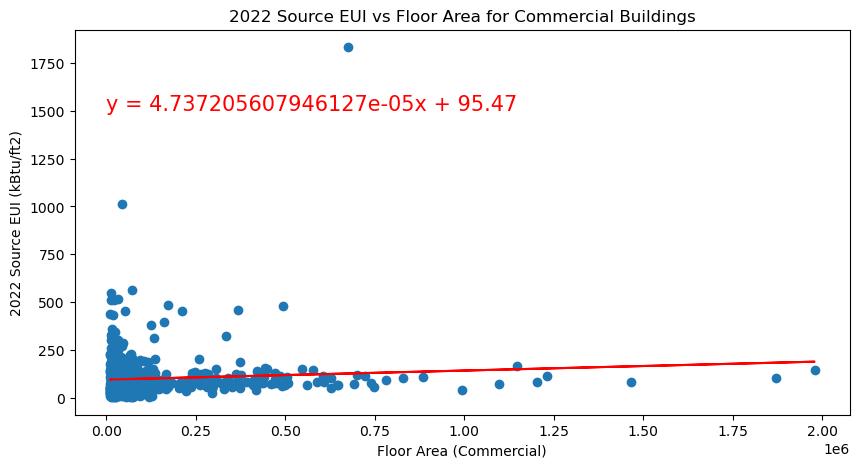

In [111]:
# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1c = commercial_df.iloc[:, 1].astype(float)
engy_use_2022c = commercial_df.iloc[:, 5].astype(float)
plt.scatter(flr_area_1c, engy_use_2022c)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1c, engy_use_2022c)

# Calculate regression line values
regress_values = flr_area_1c * slope + intercept

plt.plot(flr_area_1c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1500), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_1c = rvalue

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2022 Source EUI (kBtu/ft2)')
plt.title('2022 Source EUI vs Floor Area for Commercial Buildings')
plt.savefig('Figure 4a Source EUI vs Floor Area for Commercial Buildings.png', bbox_inches='tight')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2022 in SF is: {round(correlation_1c, 4)}')
# Display the plot
plt.show()

The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: -0.097


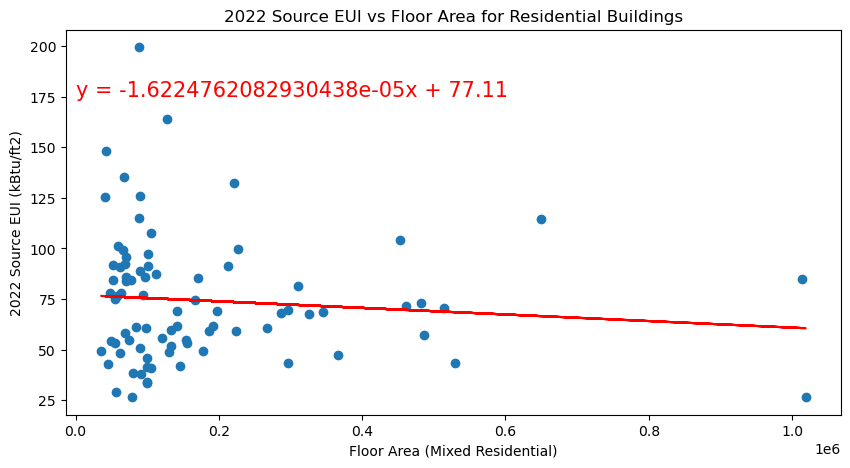

In [112]:
# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2022m = Mixed_Residential_df.iloc[:, 7].astype(float)
plt.scatter(flr_area_1m, engy_use_2022m)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1m, engy_use_2022m)

# Calculate regression line values
regress_values = flr_area_1m * slope + intercept

plt.plot(flr_area_1m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
#correlation_1m = st.pearsonr(flr_area_1m, engy_use_2022m)
correlation_1m = rvalue
# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2022 Source EUI (kBtu/ft2)')
plt.title('2022 Source EUI vs Floor Area for Residential Buildings')
plt.savefig('Figure 4b Source EUI vs Floor Area for Residential Buildings.png', bbox_inches='tight')

# Print the correlation value
#print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m[0], 4)}')
print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m, 4)}')
# Display the plot
plt.show()

In [92]:
# Filter the DataFrame to include only 'Commercial' properties for the year 2018 to 2022  
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Extract the floor area and energy use of Commercial Buildings for the year 2018 to 2022  
# Extract the floor area and energy use values as floats

flr_area_1c = commercial_df.iloc[:, 1].astype(float)
engy_use_2022c = commercial_df.iloc[:, 5].astype(float)

flr_area_2c = commercial_df.iloc[:, 1].astype(float)
engy_use_2021c = commercial_df.iloc[:, 7].astype(float)

flr_area_3c = commercial_df.iloc[:, 1].astype(float)
engy_use_2020c = commercial_df.iloc[:, 9].astype(float)

flr_area_4c = commercial_df.iloc[:, 1].astype(float)
engy_use_2019c = commercial_df.iloc[:, 11].astype(float)

flr_area_5c = commercial_df.iloc[:, 1].astype(float)
engy_use_2018c = commercial_df.iloc[:, 13].astype(float)

# Calculate the linregress between floor area and energy use of Commercial buildings for the year 2018 to 2022
(slope, intercept, rvalue1c, pvalue1c, stderr) = st.linregress(flr_area_1c, engy_use_2022c)
(slope, intercept, rvalue2c, pvalue2c, stderr) = st.linregress(flr_area_2c, engy_use_2021c)
(slope, intercept, rvalue3c, pvalue3c, stderr) = st.linregress(flr_area_3c, engy_use_2020c)
(slope, intercept, rvalue4c, pvalue4c, stderr) = st.linregress(flr_area_4c, engy_use_2019c)
(slope, intercept, rvalue5c, pvalue5c, stderr) = st.linregress(flr_area_5c, engy_use_2018c)

# Calculate the correlation coefficient between floor area and energy use of Commercial buildings for the year 2018 to 2022
correlation_1c = rvalue1c
correlation_2c = rvalue2c
correlation_3c = rvalue3c
correlation_4c = rvalue4c
correlation_5c = rvalue5c

# Calculate the p-value between floor area and energy use of Commercial buildings for the year 2018 to 2022
pvalue_1c = pvalue1c
pvalue_2c = pvalue2c
pvalue_3c = pvalue3c
pvalue_4c = pvalue4c
pvalue_5c = pvalue5c

In [93]:
# Calculate the correlation coefficient and p-value between floor area and energy use of Commercial buildings for each year
correlations_comm = [correlation_1c, correlation_2c, correlation_3c, correlation_4c, correlation_5c]
mean_correlation_comm = np.mean(correlations_comm)  # Calculate the mean correlation for commercial buildings
pvalues_comm = [pvalue_1c, pvalue_2c, pvalue_3c, pvalue_4c, pvalue_5c]
mean_pvalue_comm = np.mean(pvalues_comm)  # Calculate the mean p-value for commercial buildings

# Print the mean correlation and p-value for commercial buildings
print("Mean correlation of commercial buildings (floor area vs energy use) from 2018 to 2022 is:", mean_correlation_comm)
print("Mean p-value of commercial buildings (floor area vs energy use) from 2018 to 2022 is:", mean_pvalue_comm)

Mean correlation of commercial buildings (floor area vs energy use) from 2018 to 2022 is: 0.08058326698488147
Mean p-value of commercial buildings (floor area vs energy use) from 2018 to 2022 is: 0.05119773066264246


In [94]:
# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

# Extract the floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2022  
# Extract the floor area and energy use values as floats

flr_area_1m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2022m = Mixed_Residential_df.iloc[:, 5].astype(float)

flr_area_2m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2021m = Mixed_Residential_df.iloc[:, 7].astype(float)

flr_area_3m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2020m = Mixed_Residential_df.iloc[:, 9].astype(float)

flr_area_4m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2019m = Mixed_Residential_df.iloc[:, 11].astype(float)

flr_area_5m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2018m = Mixed_Residential_df.iloc[:, 13].astype(float)

# Calculate the linregress between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2022 
(slope, intercept, rvalue1m, pvalue1m, stderr) = st.linregress(flr_area_1m, engy_use_2022m)
(slope, intercept, rvalue2m, pvalue2m, stderr) = st.linregress(flr_area_2m, engy_use_2021m)
(slope, intercept, rvalue3m, pvalue3m, stderr) = st.linregress(flr_area_3m, engy_use_2020m)
(slope, intercept, rvalue4m, pvalue4m, stderr) = st.linregress(flr_area_4m, engy_use_2019m)
(slope, intercept, rvalue5m, pvalue5m, stderr) = st.linregress(flr_area_5m, engy_use_2018m)

# Calculate the correlation coefficient between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2022
correlation_1m = rvalue1m
correlation_2m = rvalue2m
correlation_3m = rvalue3m
correlation_4m = rvalue4m
correlation_5m = rvalue5m

# Calculate the p-value between floor area and energy use of Mixed Residential Buildings  for the year 2018 to 2022  
pvalue_1m = pvalue1m
pvalue_2m = pvalue2m
pvalue_3m = pvalue3m
pvalue_4m = pvalue4m
pvalue_5m = pvalue5m

In [95]:
# Calculate the correlation coefficient and p-value between floor area and energy use of Mixed Residential buildings for each year
correlations_mixed_Resd = [correlation_1m, correlation_2m, correlation_3m, correlation_4m, correlation_5m]
mean_correlation_mixedRsd = np.mean(correlations_mixed_Resd)  # Calculate the mean correlation for mixed residential buildings
pvalues_mixed_Resd = [pvalue_1m, pvalue_2m, pvalue_3m, pvalue_4m, pvalue_5m]
mean_pvalue_mixedRsd = np.mean(pvalues_mixed_Resd)  # Calculate the mean p-value for mixed residential buildings

# Print the mean correlation and p-value for mixed residential buildings
print("Mean correlation of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is:", mean_correlation_mixedRsd)
print("Mean p-value of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is:", mean_pvalue_mixedRsd)

Mean correlation of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is: -0.07641699519445266
Mean p-value of mixed residential buildings (floor area vs energy use) from 2018 to 2022 is: 0.5112473898708946


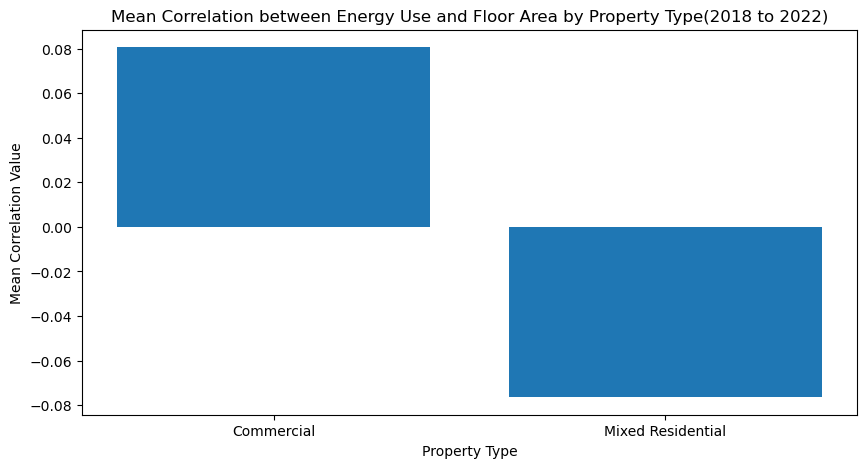

In [113]:
# Define the property types
property_types = ['Commercial', 'Mixed Residential']
plt.figure(figsize=(10,5))
# Define the mean correlation values for each property type
#correlation_values = [mean_commercial_correlation, mean_mixed_residential_correlation]
correlation_values = [mean_correlation_comm, mean_correlation_mixedRsd]
# Create a bar plot
plt.bar(property_types, correlation_values)

# Add labels and title to the plot
plt.xlabel('Property Type')
plt.ylabel('Mean Correlation Value')
plt.title('Mean Correlation between Energy Use and Floor Area by Property Type(2018 to 2022)')
plt.savefig('Figure 4c Mean Correlation between Energy Use and Floor Area by Property Type(2018 to 2022).png', bbox_inches='tight')

# Display the plot
plt.show()